In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [11]:
diabetes = datasets.load_diabetes()
print("Описание набора данных:")
print(diabetes.DESCR)

Описание набора данных:
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 fe

In [12]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
print("\nПервые 5 строк данных:")
print(df.head())


Первые 5 строк данных:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [13]:
correlations = df.corr()['target'].sort_values(ascending=False)
print("\nКорреляция признаков с целевой переменной:")
print(correlations)


Корреляция признаков с целевой переменной:
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


In [14]:
selected_feature = correlations.index[1]
print(f"\nВыбранный признак для регрессии: {selected_feature}")


Выбранный признак для регрессии: bmi


In [15]:
X = df[[selected_feature]].values
y = df['target'].values

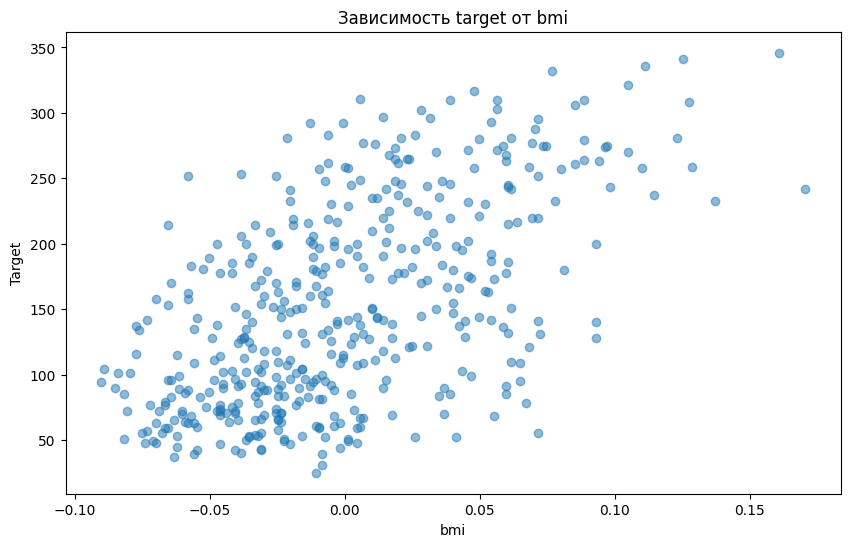

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)
plt.title(f'Зависимость target от {selected_feature}')
plt.xlabel(selected_feature)
plt.ylabel('Target')
plt.show()

In [17]:
sklearn_model = LinearRegression()
sklearn_model.fit(X, y)

print("\nКоэффициенты модели (Scikit-Learn):")
print(f"Intercept (свободный член): {sklearn_model.intercept_:.2f}")
print(f"Coefficient (коэффициент): {sklearn_model.coef_[0]:.2f}")




Коэффициенты модели (Scikit-Learn):
Intercept (свободный член): 152.13
Coefficient (коэффициент): 949.44


In [18]:
# Собственная реализация линейной регрессии
class MyLinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        # Расчет коэффициентов по методу наименьших квадратов
        X_mean = np.mean(X)
        y_mean = np.mean(y)

        numerator = np.sum((X - X_mean) * (y - y_mean))
        denominator = np.sum((X - X_mean) ** 2)

        self.coef_ = numerator / denominator
        self.intercept_ = y_mean - self.coef_ * X_mean

    def predict(self, X):
        return self.intercept_ + self.coef_ * X




Коэффициенты модели (собственная реализация):
Intercept (свободный член): 152.13
Coefficient (коэффициент): 949.44


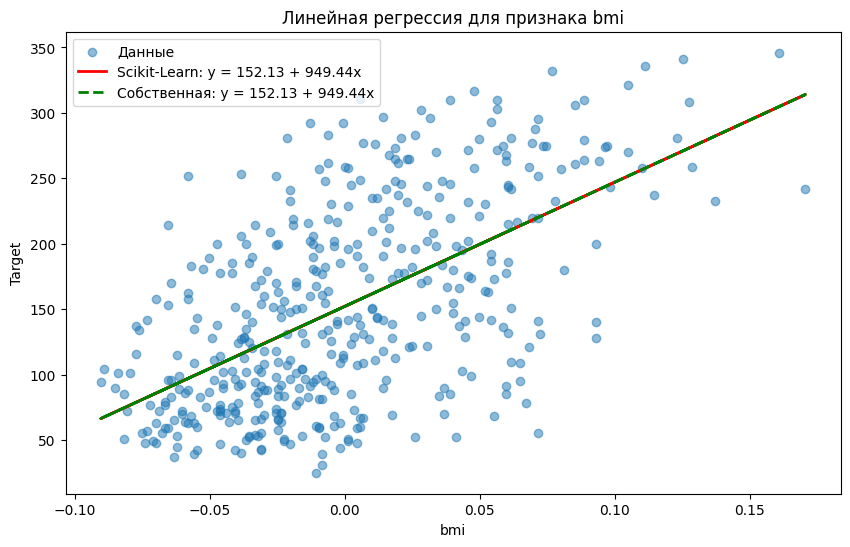

In [19]:
# Обучение собственной модели
my_model = MyLinearRegression()
my_model.fit(X.ravel(), y)

print("\nКоэффициенты модели (собственная реализация):")
print(f"Intercept (свободный член): {my_model.intercept_:.2f}")
print(f"Coefficient (коэффициент): {my_model.coef_:.2f}")

# Визуализация данных и регрессионных прямых
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Данные')

# Линия регрессии Scikit-Learn
plt.plot(X, sklearn_model.predict(X), color='red', linewidth=2,
         label=f'Scikit-Learn: y = {sklearn_model.intercept_:.2f} + {sklearn_model.coef_[0]:.2f}x')

# Линия регрессии собственной реализации
plt.plot(X, my_model.predict(X.ravel()), color='green', linestyle='--', linewidth=2,
         label=f'Собственная: y = {my_model.intercept_:.2f} + {my_model.coef_:.2f}x')

plt.title(f'Линейная регрессия для признака {selected_feature}')
plt.xlabel(selected_feature)
plt.ylabel('Target')
plt.legend()
plt.show()



Создаем тестовые данные для предсказаний
Предсказания обеих моделей
И Создаем таблицу с результатами предсказаний




In [20]:

X_test = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

y_pred_sklearn = sklearn_model.predict(X_test)
y_pred_my = my_model.predict(X_test.ravel())

results = pd.DataFrame({
    selected_feature: X_test.ravel(),
    'Scikit-Learn Prediction': y_pred_sklearn,
    'Custom Model Prediction': y_pred_my
})

print("\nТаблица с результатами предсказаний (первые 5 строк):")
print(results.head())


Таблица с результатами предсказаний (первые 5 строк):
        bmi  Scikit-Learn Prediction  Custom Model Prediction
0 -0.090275                66.422935                66.422935
1 -0.087641                68.924366                68.924366
2 -0.085006                71.425798                71.425798
3 -0.082371                73.927229                73.927229
4 -0.079737                76.428660                76.428660
